In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


# Loading data

In [2]:
print('loading dataset')
dataset = pd.read_csv('../data.txt', delimiter=" ")
subset  = dataset[(dataset["moteid"] >=1)]
subset  = subset[(subset["moteid"] <=3)]

#separa os datasets
print('separing dataset')
test  = dataset[(dataset["moteid"] <=1)]
df  = dataset[dataset["moteid"] > 1]

loading dataset
separing dataset


In [3]:
df = df[df['temperature']<30]
df = df[df['temperature']>15]

test = test[test['temperature']<30]
test = test[test['temperature']>15]

In [4]:
# df.index = df['timestamp']
df.drop(['date','time'], axis=1, inplace=True)

# test.index = test['timestamp']
test.drop(['date','time'], axis=1, inplace=True)

In [5]:
df

,epoch,moteid,temperature,humidity,light,voltage
43048,21,2.0,19.5670,39.6878,121.44,2.67532
43049,25,2.0,19.5376,39.7557,121.44,2.67532
43050,58,2.0,19.4788,39.6878,121.44,2.66332
43051,61,2.0,19.4494,39.7217,121.44,2.67532
43052,72,2.0,19.4984,39.5860,121.44,2.67532
...,...,...,...,...,...,...
2313148,62421,58.0,24.1730,21.6575,1729.60,2.78836
2313149,62423,58.0,24.1436,21.7310,1729.60,2.78836
2313150,62424,58.0,24.1436,21.6575,1670.72,2.78836
2313151,62426,58.0,24.1240,21.5839,1670.72,2.78836


# general graphic


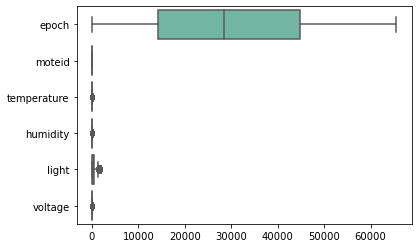

In [6]:
 ax = sns.boxplot(data=df, orient="h", palette="Set2")

# Normalized Graphic 

In [7]:
from sklearn.preprocessing import StandardScaler

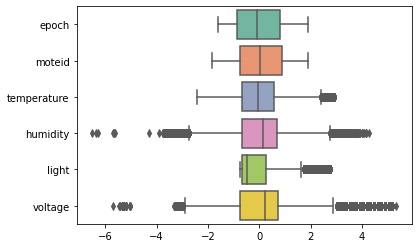

In [8]:
scaler = StandardScaler().fit(df)
norm_subset = pd.DataFrame(scaler.transform(df), columns = df.columns)
ax = sns.boxplot(data=norm_subset, orient="h", palette="Set2")

In [19]:
# ax = sns.boxplot(data=df['temperature'], orient="h", palette="Set2")

Text(0.5, 1.0, 'Attribute: temperature')

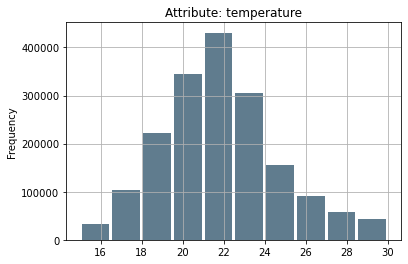

In [10]:
df["temperature"].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.title("Attribute: temperature")

In [11]:
# df["delay"].plot.hist(grid=True, bins=10, rwidth=0.9,
#                    color='#607c8e')
# plt.title("Attribute: delay")

In [12]:
df.corr()

,epoch,moteid,temperature,humidity,light,voltage
epoch,1.000000,0.059519,0.196891,0.192559,0.040260,-0.737940
moteid,0.059519,1.000000,-0.036342,0.045410,0.090001,-0.024387
temperature,0.196891,-0.036342,1.000000,-0.623561,0.400882,0.089401
humidity,0.192559,0.045410,-0.623561,1.000000,-0.248530,-0.423831
light,0.040260,0.090001,0.400882,-0.248530,1.000000,0.083503
voltage,-0.737940,-0.024387,0.089401,-0.423831,0.083503,1.000000


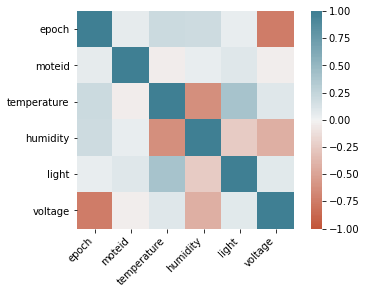

In [13]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

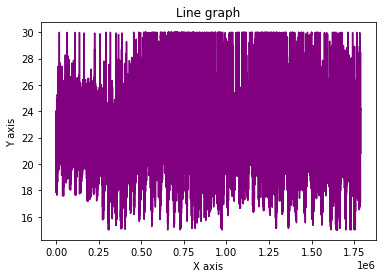

In [14]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(df[df.temperature<30].temperature)), df.temperature, color ="purple")  
plt.show()

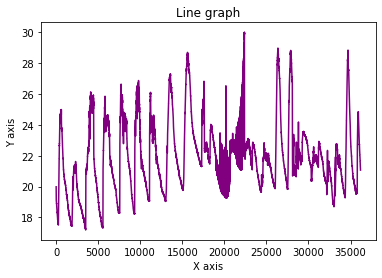

In [15]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(test.temperature)), test.temperature, color ="purple")  
plt.show()

In [16]:
from sklearn.preprocessing import RobustScaler

In [17]:
f_columns = ['delay','temperature']

f_transformer = RobustScaler()
lb_transformer = RobustScaler()

f_transformer = f_transformer.fit(df[f_columns].to_numpy())
df.loc[:,f_columns] = f_transformer.transform(df[f_columns].to_numpy())

lb_transformer = lb_transformer.fit(df[['label']])
df['label'] = lb_transformer.transform(df[['label']])

KeyError: "['delay'] not in index"

In [ ]:
plt.title("Line graph")  
plt.xlabel("X axis")  
plt.ylabel("Y axis")  
plt.plot(np.arange(len(df.delay.iloc[1000:3000])), df.delay.iloc[1000:3000], color ="red")  
plt.plot(np.arange(len(df.label.iloc[1000:3000])), df.label.iloc[1000:3000], color ="green") 
plt.show()

In [ ]:
df[df.label==1]

In [ ]:
np.argsort(df[df.label==1].iloc[:,8])

In [ ]:
df[df.label==1].iloc[0,8]